In [1]:

import os
print(os.system('which python'))
from pathlib import Path

from mmvae_hub.experiment_vis.utils import *
from mmvae_hub.utils.MongoDB import MongoDatabase
from mmvae_hub.utils.setup.flags_utils import BaseFlagsSetup, get_config_path

[15:07:59 CEST] Log file: /Users/Hendrik/Documents/master_4/MMVAE_Hub/mmvae_hub/logger/logs/UTC-20210502-130759.log
[15:08:09 CEST] Enabling eager execution
[15:08:09 CEST] Enabling v2 tensorshape
[15:08:09 CEST] Enabling resource variables
[15:08:09 CEST] Enabling tensor equality
[15:08:09 CEST] Enabling control flow v2


In [ ]:
# infer the dataset from the experiment uid, which is also the parent directory name
exp_uid = Path(os.getcwd()).name
print(exp_uid)
dataset_name = exp_uid.split('_')[0].lower()

In [2]:
flags_setup = BaseFlagsSetup(get_config_path(dataset=dataset_name))
add_args = {'save_figure': False}
if Path('flags.rar').exists():
    flags = flags_setup.load_old_flags(Path('flags.rar'), add_args=add_args)

elif Path('flags.json').exists():
    flags = flags_setup.load_old_flags(Path('flags.json'), is_dict=True, add_args=add_args)
else:
    raise RuntimeError(f'No flags were found in experiment dir {os.getcwd()}')

experiment_uid = flags.experiment_uid
experiments_database = MongoDatabase(training=False, _id=experiment_uid)
experiment_dict = experiments_database.get_experiment_dict()
display(experiment_uid)
display(BaseFlagsSetup.get_version_from_setup_config())

[15:08:12 CEST] From /Users/Hendrik/opt/anaconda3/envs/mmvae/lib/python3.9/site-packages/tensorflow/python/summary/summary_iterator.py:31: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Experiment dir:  /Users/Hendrik/Documents/master_4/bartholin_mmvae_results/polymnist_planar_mixture_2021_04_29_23_06_00_937191


In [ ]:
df = make_experiments_dataframe(experiments_database.connect())
prd_cols = [col for col in df.columns if col.startswith('prd')]

show_cols = ['amortized_flow', 'weighted_mixture', 'score', 'method', 'end_epoch', 'class_dim', 'max_beta', '_id',
             'score_lr', 'score_lr_q0', 'score_lr_zk', 'score_gen', 'score_prd', 'num_mods', *prd_cols]
df = df[show_cols].sort_values(by=['score'], ascending=False)
display(df.loc[df['_id'] == experiment_uid])

# Latent Representation

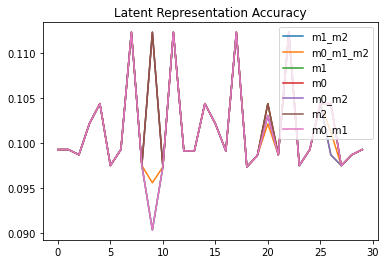

In [3]:
plot_lr_accuracy(experiment_dict)

# Generation

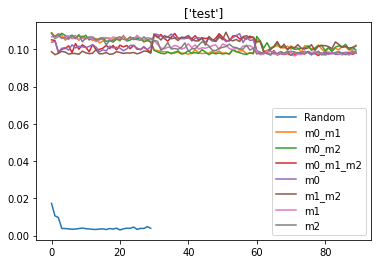

In [4]:
# plot_gen_results(tensorboard_logs_dir)
plot_coherence_accuracy(experiment_dict)

# prd scores

In [ ]:
plot_prd_scores(df.loc[df['_id'] == experiment_uid])

# Train logs

In [ ]:
plot_betas(experiment_dict)

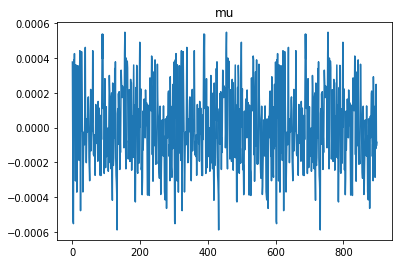

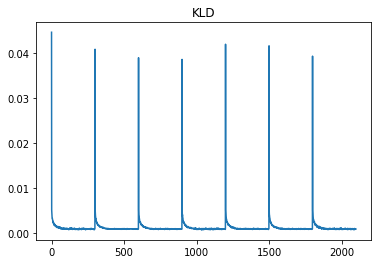

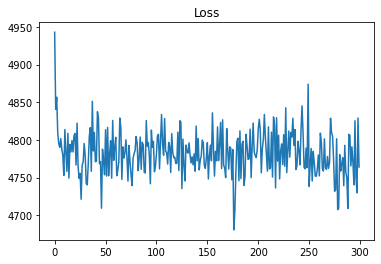

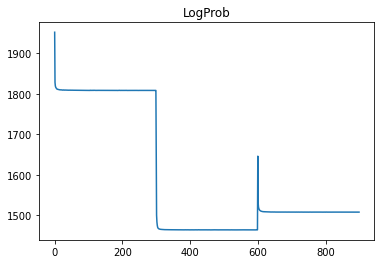

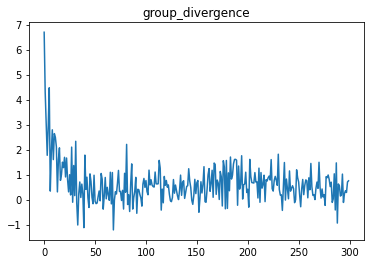

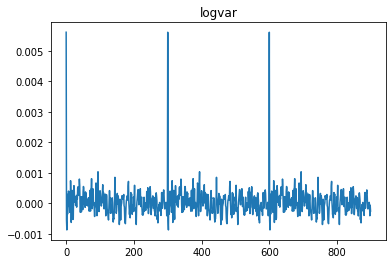

In [5]:
plot_basic_batch_logs('train', experiment_dict)

# Test logs

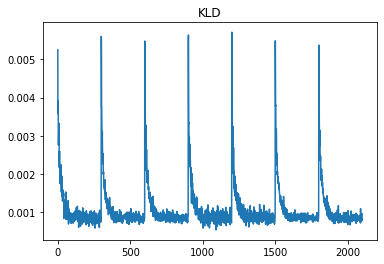

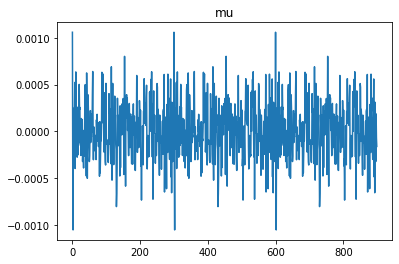

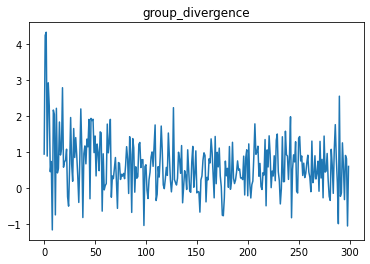

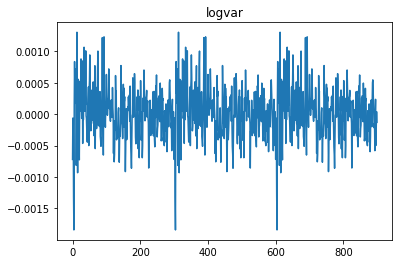

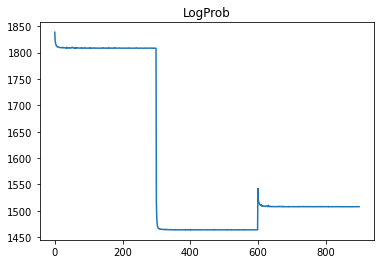

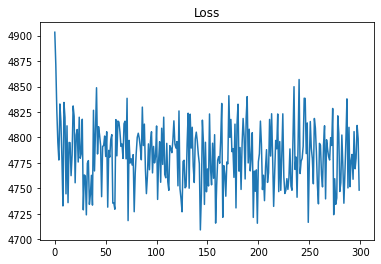

In [6]:
plot_basic_batch_logs('test', experiment_dict)

In [ ]:
# show_latents(experiment_dict)

# Likelihoods

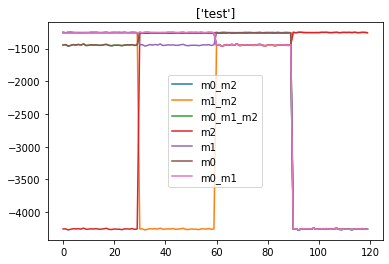

In [7]:

plot_likelihoods(experiment_dict)


# Test generation

In [ ]:
show_generated_figs(Path(os.getcwd()), flags=flags)
